<a href="https://colab.research.google.com/github/LonnieSly/Cajun-Creole-Restaurant-Revenue-Optimization-using-AI-ML/blob/main/Smart_Menu_Insights_Cajun_Creole_Edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🦐 Smart Menu Insights: Cajun-Creole Edition

Using AI & Machine Learning to Optimize Menu Performance and Reduce Waste

📘 Project Overview

This project explores how restaurants can use AI and machine learning to make smarter business decisions.
As a data analyst transitioning into AI/ML, I wanted to show how predictive analytics and simulated generative AI insights can help a Cajun-Creole restaurant:

Identify best- and worst-performing menu items

Predict future sales and profitability

Reduce food waste

Turn data into practical business strategies

🎯 Objectives

Create a realistic synthetic restaurant dataset (10,000 orders).

Perform data cleaning, exploration, and visualization to uncover key trends.

Apply machine learning to predict menu performance.

Simulate AI-driven recommendations for management decisions.

Present findings with clear storytelling for non-technical audiences.

💡 Why This Project Matters

The food and hospitality industry often relies on intuition instead of data.
By blending restaurant operations experience with data analytics and AI, this project demonstrates how a restaurant can use data to:

Improve profit margins

Reduce waste and overstocking

Enhance customer satisfaction through insights-driven menu optimization

| Category               | Tools / Libraries                        |
| ---------------------- | ---------------------------------------- |
| Programming            | Python (Google Colab)                    |
| Data Handling          | Pandas, NumPy                            |
| Visualization          | Matplotlib, Seaborn                      |
| Machine Learning       | Scikit-learn                             |
| AI Strategy Simulation | Prompt-style recommendations             |
| Data Generation        | Faker library                            |
| Communication          | Data storytelling, markdown explanations |

🧩 Dataset Summary

The dataset used here is synthetically generated to resemble a year’s worth of restaurant sales activity.
Each record includes:

Order Details: Date, Menu Item, Category, Quantity Sold

Financials: Price, Cost, Profit, Revenue, Waste Cost

Customer Behavior: Rating, Promotion, Review Text

Contextual Factors: Day of Week, Season, Weather

🪄 Next Steps

This notebook will proceed through five key phases:

Data Generation (Synthetic Cajun-Creole sales dataset ✅ done)

Data Cleaning & EDA (explore trends and relationships)

Machine Learning Modeling (predict performance)

Generative AI Simulation (recommend strategy)

Storytelling Summary (communicate value to stakeholders)

📌 Author: {Lionel Sylvester]
📅 Updated: October 2025
🏷️ Tags: AI for Business, Machine Learning, Hospitality Analytics, Data Storytelling

In [1]:
# STEP 1: Import the necessary libraries
import numpy as np
import pandas as pd
import random

In [2]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.9 MB/s eta 0:00:00


In [3]:
from faker import Faker

In [4]:
# Initialize Faker for synthetic text & date generation
fake = Faker()

In [5]:
# Set random seed for reproducibility (so results are the same each run)
np.random.seed(42)
random.seed(42)

In [6]:
# STEP 2: Create a list of Cajun-Creole menu items
menu_items = [
    "Crawfish Étouffée", "Shrimp Creole", "Jambalaya", "Gumbo",
    "Red Beans & Rice", "Blackened Catfish", "Po' Boy Sandwich",
    "Fried Alligator Bites", "Beignets", "Bread Pudding",
    "Bananas Foster", "Seafood Platter", "Muffuletta",
    "Crab Cakes", "Dirty Rice", "Grilled Oysters", "Okra Soup",
    "Boudin Balls", "Hush Puppies", "Cajun Fries"
]
categories = {
    "Crawfish Étouffée": "Main",
    "Shrimp Creole": "Main",
    "Jambalaya": "Main",
    "Gumbo": "Main",
    "Red Beans & Rice": "Side",
    "Blackened Catfish": "Main",
    "Po' Boy Sandwich": "Main",
    "Fried Alligator Bites": "Appetizer",
    "Beignets": "Dessert",
    "Bread Pudding": "Dessert",
    "Bananas Foster": "Dessert",
    "Seafood Platter": "Main",
    "Muffuletta": "Main",
    "Crab Cakes": "Appetizer",
    "Dirty Rice": "Side",
    "Grilled Oysters": "Appetizer",
    "Okra Soup": "Side",
    "Boudin Balls": "Appetizer",
    "Hush Puppies": "Side",
    "Cajun Fries": "Side"
}

In [7]:
# STEP 3: Define helper functions for randomization
def random_price(category):
    """Assign realistic prices by category"""
    if category == "Main":
        return round(np.random.uniform(14, 28), 2)
    elif category == "Appetizer":
        return round(np.random.uniform(6, 12), 2)
    elif category == "Dessert":
        return round(np.random.uniform(5, 10), 2)
    else:
        return round(np.random.uniform(3, 8), 2)

def random_cost(price):
    """Simulate cost as 40–70% of price"""
    return round(price * np.random.uniform(0.4, 0.7), 2)

def random_weather():
    """Simulate simple daily weather patterns"""
    return random.choice(["Sunny", "Rainy", "Cloudy", "Hot", "Stormy"])

def random_season(month):
    """Map months to seasons"""
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

def random_review(rating):
    """Generate short text reviews tied to customer rating"""
    positive = [
        "Absolutely loved it!", "Perfectly seasoned and flavorful.",
        "Will definitely order again.", "Authentic taste and great service!"
    ]
    neutral = [
        "It was okay, not bad.", "Pretty average experience.",
        "Nothing special but decent value."
    ]
    negative = [
        "Too salty and overcooked.", "Didn’t meet my expectations.",
        "Wouldn’t order again.", "Service was slow."
    ]
    if rating >= 4:
        return random.choice(positive)
    elif rating >= 3:
        return random.choice(neutral)
    else:
        return random.choice(negative)

In [8]:
# STEP 4: Generate synthetic data
num_records = 10000
data = []

for _ in range(num_records):
    # Randomly select menu item & category
    item = random.choice(menu_items)
    category = categories[item]
    price = random_price(category)
    cost = random_cost(price)

    # Generate random date (1 year range)
    date = fake.date_between(start_date="-365d", end_date="today")
    month = date.month
    day_of_week = date.strftime("%A")

    # Simulate restaurant environment context
    weather = random_weather()
    season = random_season(month)
    promotion = np.random.choice([0, 1], p=[0.8, 0.2])  # 20% chance of promo

    # Generate sales + performance data
    quantity = np.random.poisson(lam=3) + 1  # average 3 sold per order
    waste = round(abs(np.random.normal(0.3, 0.2)), 2)   # random small waste amount
    rating = round(np.clip(np.random.normal(4, 0.8), 1, 5), 1)  # avg rating ~4

    # Add text review
    review = random_review(rating)

    # Build record row
    data.append([
        fake.uuid4(), date, item, category, price, cost, quantity, waste,
        rating, promotion, day_of_week, weather, season, review
    ])

In [9]:
# STEP 5: Create a DataFrame
columns = [
    "Order_ID", "Date", "Menu_Item", "Category", "Price", "Cost",
    "Quantity_Sold", "Waste_Qty", "Customer_Rating", "Promotion_Applied",
    "Day_of_Week", "Weather", "Season", "Customer_Review"
]

df = pd.DataFrame(data, columns=columns)

In [10]:
# STEP 6: Derived metrics (for analysis)
df["Revenue"] = df["Price"] * df["Quantity_Sold"]
df["Profit"] = (df["Price"] - df["Cost"]) * df["Quantity_Sold"]
df["Waste_Cost"] = df["Waste_Qty"] * df["Cost"]

In [11]:
# STEP 7: Preview the synthetic dataset
print("✅ Synthetic Cajun-Creole dataset created successfully!")
print("Dataset shape:", df.shape)
df.head(10)

✅ Synthetic Cajun-Creole dataset created successfully!
Dataset shape: (10000, 17)


,Order_ID,Date,Menu_Item,Category,Price,Cost,Quantity_Sold,Waste_Qty,Customer_Rating,Promotion_Applied,Day_of_Week,Weather,Season,Customer_Review,Revenue,Profit,Waste_Cost
0,e098ca73-0439-4bf9-b67c-defca328e84a,2025-04-15,Gumbo,Main,19.24,13.18,3,0.62,4.6,0,Tuesday,Sunny,Spring,Will definitely order again.,57.72,18.18,8.1716
1,d3e0c7d6-956c-4203-bd7c-6b5e0dc3cf17,2025-03-04,Fried Alligator Bites,Appetizer,6.12,4.23,2,0.19,3.3,1,Tuesday,Rainy,Spring,"It was okay, not bad.",12.24,3.78,0.8037
2,356824e0-bdcb-4218-b0f2-92a7599e3d1d,2025-04-22,Gumbo,Main,21.35,11.31,3,0.16,2.3,0,Tuesday,Stormy,Spring,Too salty and overcooked.,64.05,30.12,1.8096
3,cc23ee30-df1b-4872-a6e1-c02ceda24630,2025-06-17,Hush Puppies,Side,6.93,3.19,2,0.07,4.3,0,Tuesday,Hot,Summer,Absolutely loved it!,13.86,7.48,0.2233
4,38b8f5c7-2d33-48c7-a560-a05f221b2d4f,2025-04-20,Crawfish Étouffée,Main,14.91,10.21,3,0.18,5.0,1,Sunday,Sunny,Spring,Perfectly seasoned and flavorful.,44.73,14.10,1.8378
5,258c41c0-9bc5-40fd-aa76-bd56cdfacaab,2025-02-10,Fried Alligator Bites,Appetizer,6.73,3.69,4,0.86,5.0,0,Monday,Stormy,Winter,Absolutely loved it!,26.92,12.16,3.1734
6,356515a4-49c9-4efc-a1a6-10fd56ed87e9,2025-01-25,Boudin Balls,Appetizer,7.11,4.91,5,0.10,2.7,0,Saturday,Rainy,Winter,Service was slow.,35.55,11.00,0.4910
7,8fe8c7b9-43f2-4b73-9fc3-921ff55ddda6,2025-04-12,Fried Alligator Bites,Appetizer,7.63,4.95,3,0.42,4.7,0,Saturday,Hot,Spring,Will definitely order again.,22.89,8.04,2.0790
8,085aca61-d671-4788-bb83-781eee26ff5f,2025-01-03,Crawfish Étouffée,Main,24.21,15.29,2,0.37,4.8,0,Friday,Rainy,Winter,Authentic taste and great service!,48.42,17.84,5.6573
9,e7b6e4c8-39de-4305-ab9c-e061027df43e,2025-06-28,Bananas Foster,Dessert,6.65,2.79,6,0.49,4.6,0,Saturday,Cloudy,Summer,Perfectly seasoned and flavorful.,39.90,23.16,1.3671


In [12]:
# STEP 8: Save as CSV (so you can reuse later)
df.to_csv("cajun_creole_sales.csv", index=False)
print("\n📁 File 'cajun_creole_sales.csv' saved successfully in your Colab environment!")


📁 File 'cajun_creole_sales.csv' saved successfully in your Colab environment!


🙏 Credits & Acknowledgments

This project was created as part of my continuous learning journey in AI and Machine Learning for Data Analytics.

Special thanks to:

Google Colab – for providing a free and accessible environment to practice data science.

Faker, Pandas, NumPy, and Scikit-learn – for enabling realistic data generation and analysis.

Open-source contributors on forums like Kaggle, Stack Overflow, and the Python community for their invaluable shared knowledge.

Hospitality industry mentors and experiences – for inspiring this project’s real-world context in restaurant operations and data-driven strategy.

This project is fully self-generated using synthetic data to ensure ethical, privacy-safe learning while demonstrating real-world analytical and AI skills.

🔍 Phase 2: Data Cleaning, Exploration & Visualization

In this section, we’ll prepare the dataset for analysis and discover important trends:

Check for missing or inconsistent data

Understand basic descriptive statistics

Visualize sales, profit, and waste patterns

Generate quick insights useful for restaurant management decisions

These steps help ensure the data is clean, reliable, and business-ready before applying machine learning models in Phase 3.

/tmp/ipython-input-1598927852.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Revenue', data=df, estimator='sum', ci=None)


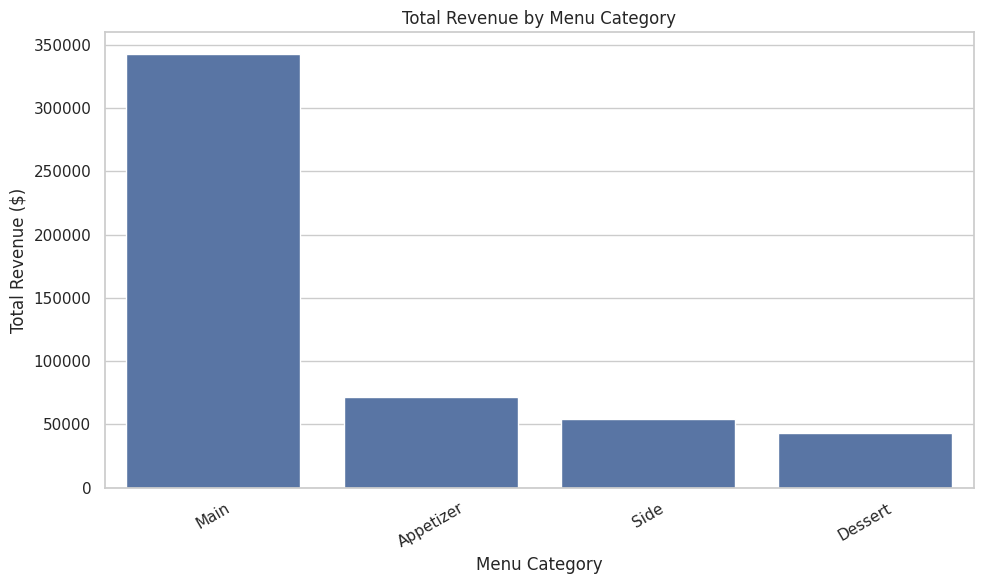

In [28]:
# --- Visualization Section: Cajun-Creole Restaurant Insights ---

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Revenue by Menu Category
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='Revenue', data=df, estimator='sum', ci=None)
plt.title('Total Revenue by Menu Category')
plt.xlabel('Menu Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [14]:
# STEP 1: Load and review dataset
df = pd.read_csv("cajun_creole_sales.csv")

# Quick overview
print("Dataset Shape:", df.shape)
print("\nColumn Information:\n")
print(df.info())

# Display a sample
df.head(5)

Dataset Shape: (10000, 17)

Column Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_ID           10000 non-null  object 
 1   Date               10000 non-null  object 
 2   Menu_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Price              10000 non-null  float64
 5   Cost               10000 non-null  float64
 6   Quantity_Sold      10000 non-null  int64  
 7   Waste_Qty          10000 non-null  float64
 8   Customer_Rating    10000 non-null  float64
 9   Promotion_Applied  10000 non-null  int64  
 10  Day_of_Week        10000 non-null  object 
 11  Weather            10000 non-null  object 
 12  Season             10000 non-null  object 
 13  Customer_Review    10000 non-null  object 
 14  Revenue            10000 non-null  float64
 15  Profit             100

,Order_ID,Date,Menu_Item,Category,Price,Cost,Quantity_Sold,Waste_Qty,Customer_Rating,Promotion_Applied,Day_of_Week,Weather,Season,Customer_Review,Revenue,Profit,Waste_Cost
0,e098ca73-0439-4bf9-b67c-defca328e84a,2025-04-15,Gumbo,Main,19.24,13.18,3,0.62,4.6,0,Tuesday,Sunny,Spring,Will definitely order again.,57.72,18.18,8.1716
1,d3e0c7d6-956c-4203-bd7c-6b5e0dc3cf17,2025-03-04,Fried Alligator Bites,Appetizer,6.12,4.23,2,0.19,3.3,1,Tuesday,Rainy,Spring,"It was okay, not bad.",12.24,3.78,0.8037
2,356824e0-bdcb-4218-b0f2-92a7599e3d1d,2025-04-22,Gumbo,Main,21.35,11.31,3,0.16,2.3,0,Tuesday,Stormy,Spring,Too salty and overcooked.,64.05,30.12,1.8096
3,cc23ee30-df1b-4872-a6e1-c02ceda24630,2025-06-17,Hush Puppies,Side,6.93,3.19,2,0.07,4.3,0,Tuesday,Hot,Summer,Absolutely loved it!,13.86,7.48,0.2233
4,38b8f5c7-2d33-48c7-a560-a05f221b2d4f,2025-04-20,Crawfish Étouffée,Main,14.91,10.21,3,0.18,5.0,1,Sunday,Sunny,Spring,Perfectly seasoned and flavorful.,44.73,14.10,1.8378


In [15]:
# STEP 2: Check for missing values, duplicates, and outliers
# Missing values check
print("\nMissing Values per Column:\n")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicates removed.")
else:
    print("✅ No duplicates found.")

# Summary statistics
print("\nDescriptive Statistics:\n")
print(df.describe())

# Check unique categories
print("\nUnique Categories:\n", df["Category"].unique())
print("\nSample of Menu Items:\n", df["Menu_Item"].unique()[:10])


Missing Values per Column:

Order_ID             0
Date                 0
Menu_Item            0
Category             0
Price                0
Cost                 0
Quantity_Sold        0
Waste_Qty            0
Customer_Rating      0
Promotion_Applied    0
Day_of_Week          0
Weather              0
Season               0
Customer_Review      0
Revenue              0
Profit               0
Waste_Cost           0
dtype: int64

Duplicate Rows: 0
✅ No duplicates found.

Descriptive Statistics:

              Price          Cost  Quantity_Sold     Waste_Qty  \
count  10000.000000  10000.000000   10000.000000  10000.000000   
mean      12.779695      7.021960       3.995700      0.308754   
std        7.425552      4.263674       1.744473      0.180314   
min        3.000000      1.240000       1.000000      0.000000   
25%        6.650000      3.550000       3.000000      0.170000   
50%        9.620000      5.390000       4.000000      0.300000   
75%       19.270000     10.342500    

📊 Exploratory Data Analysis (EDA)

We’ll explore:

Which menu items and categories bring in the most revenue

How waste and profit relate

How ratings differ across categories

The effect of promotions

This helps restaurant managers identify which dishes to promote, adjust, or remove.

In [16]:
# STEP 3: Sales and Profit Overview
# Total revenue and profit
total_revenue = df["Revenue"].sum()
total_profit = df["Profit"].sum()
avg_rating = df["Customer_Rating"].mean()

print(f"💰 Total Revenue: ${total_revenue:,.2f}")
print(f"📈 Total Profit:  ${total_profit:,.2f}")
print(f"⭐ Average Rating: {avg_rating:.2f}")

💰 Total Revenue: $511,943.98
📈 Total Profit:  $230,646.27
⭐ Average Rating: 3.97


/tmp/ipython-input-1377458286.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Menu_Item', data=top_items, palette='flare')


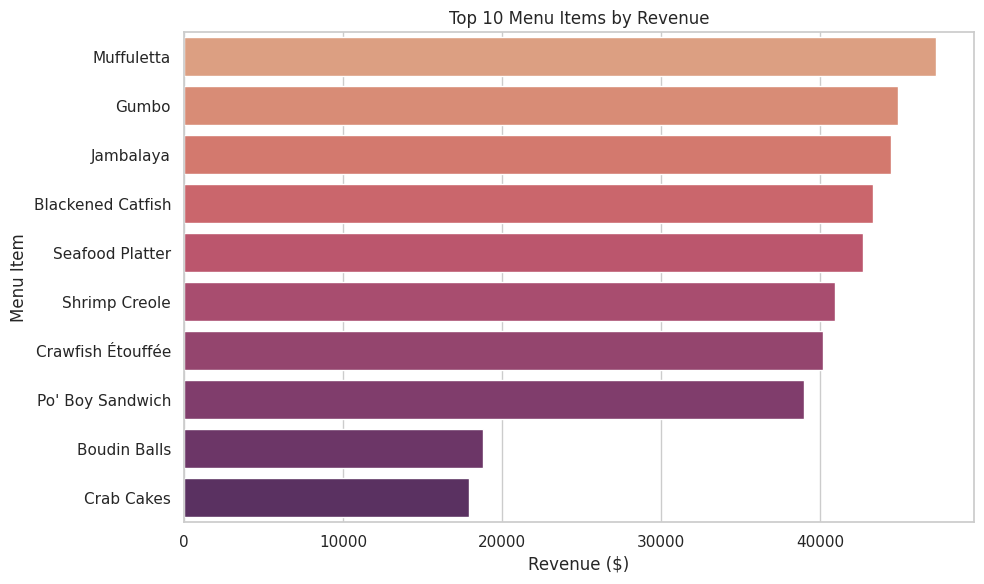

In [29]:
# 2️⃣ Top 10 Menu Items by Revenue
top_items = df.groupby('Menu_Item')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Revenue', y='Menu_Item', data=top_items, palette='flare')
plt.title('Top 10 Menu Items by Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Menu Item')
plt.tight_layout()
plt.show()

for i, fig in enumerate(plt.get_fignums(), 1):
    plt.figure(fig)
    plt.savefig(f"chart_{i}.png", bbox_inches='tight', dpi=120)

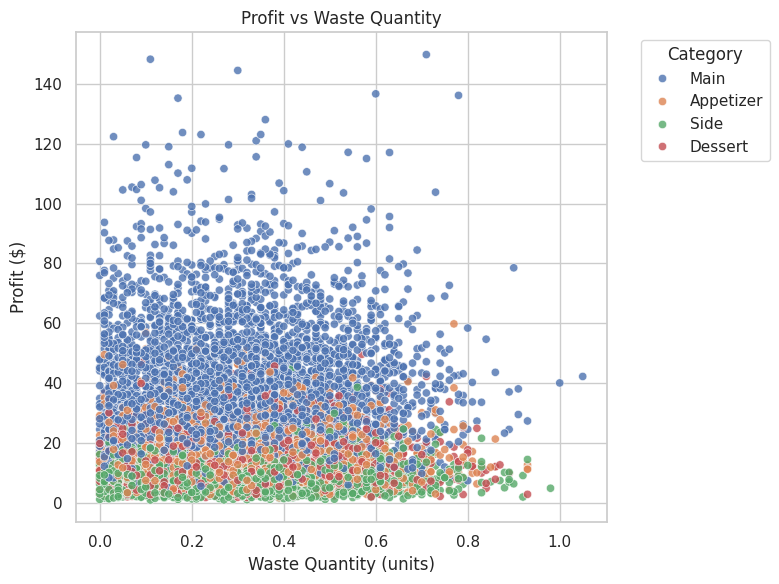

In [30]:
# 3️⃣ Profit vs Waste Quantity (Operational Efficiency)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Waste_Qty', y='Profit', data=df, hue='Category', alpha=0.8)
plt.title('Profit vs Waste Quantity')
plt.xlabel('Waste Quantity (units)')
plt.ylabel('Profit ($)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

for i, fig in enumerate(plt.get_fignums(), 1):
    plt.figure(fig)
    plt.savefig(f"chart_{i}.png", bbox_inches='tight', dpi=120)

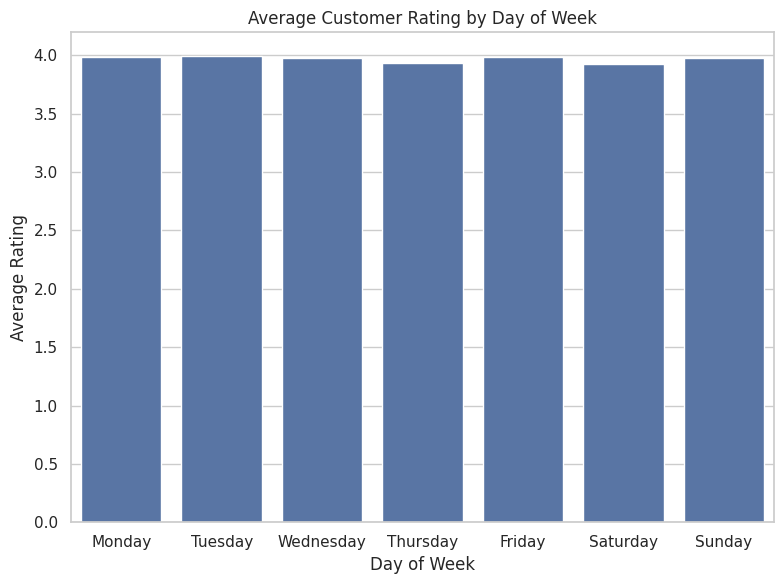

In [31]:
# 4️⃣ Average Customer Rating by Day of Week
avg_rating = df.groupby('Day_of_Week')['Customer_Rating'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Day_of_Week', y='Customer_Rating', data=avg_rating, order=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])
plt.title('Average Customer Rating by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

for i, fig in enumerate(plt.get_fignums(), 1):
    plt.figure(fig)
    plt.savefig(f"chart_{i}.png", bbox_inches='tight', dpi=120)


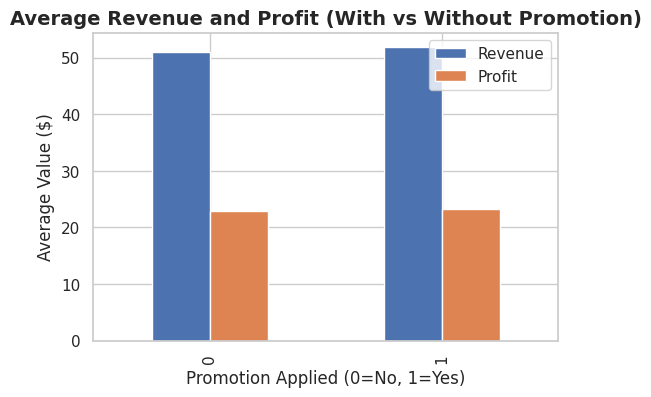

In [20]:
# STEP 7: Promotion Effectiveness
promo_comparison = df.groupby("Promotion_Applied")[["Revenue", "Profit"]].mean()

promo_comparison.plot(kind="bar", figsize=(6,4), legend=True)
plt.title("Average Revenue and Profit (With vs Without Promotion)", fontsize=14, weight="bold")
plt.xlabel("Promotion Applied (0=No, 1=Yes)")
plt.ylabel("Average Value ($)")
plt.show()

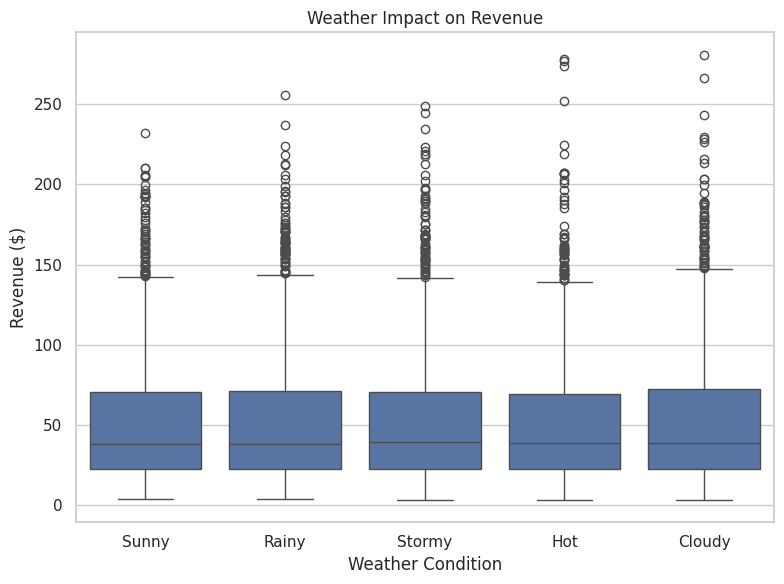

In [32]:
# 5️⃣ Weather Impact on Revenue
plt.figure(figsize=(8,6))
sns.boxplot(x='Weather', y='Revenue', data=df)
plt.title('Weather Impact on Revenue')
plt.xlabel('Weather Condition')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.show()

for i, fig in enumerate(plt.get_fignums(), 1):
    plt.figure(fig)
    plt.savefig(f"chart_{i}.png", bbox_inches='tight', dpi=120)

💡 Key Insights So Far

Top 10 Menu Items by Profit → Shows which Cajun-Creole dishes are driving most revenue (potentially your “star” items).

Waste vs Profit Scatterplot → Reveals if higher waste is reducing profitability (managers can target these items).

Ratings by Category → Helps identify where customer satisfaction is strongest or weakest (e.g., desserts vs mains).

Promotion Effectiveness → Evaluates if discounts or offers are actually boosting profit or just cutting margins.

These findings give restaurant managers a data-backed foundation to make smarter decisions on pricing, menu design, and operational focus.

## ⚙️ Step 1: Data Preparation for Modeling

Before training any model, we need to:
1. Select relevant numeric and categorical features.
2. Convert categorical data (like dish types and day of week) into numerical form using one-hot encoding.
3. Split the dataset into training and testing sets for fair model evaluation.


In [21]:
# Import libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# Define features (X) and target (y)
X = df[['Menu_Item', 'Category', 'Price', 'Cost', 'Quantity_Sold', 'Waste_Qty',
        'Customer_Rating', 'Promotion_Applied', 'Day_of_Week', 'Weather', 'Season']]
y = df['Revenue']

In [23]:
# Define categorical and numerical columns
categorical_cols = ['Menu_Item', 'Category', 'Promotion_Applied', 'Day_of_Week', 'Weather', 'Season']
numeric_cols = ['Price', 'Cost', 'Quantity_Sold', 'Waste_Qty', 'Customer_Rating']

In [24]:
# Preprocessor for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric features as is
)

# Split into training and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Step 2: Train a Linear Regression Model

We’ll use **Linear Regression** as our baseline model to predict daily revenue from menu, weather, and promotional factors.


In [25]:
# Create a pipeline that includes preprocessing and regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 9.11
Mean Squared Error: 169.92
R² Score: 0.89


## 📈 Step 3: Visualize Actual vs Predicted Revenue

We’ll visualize the relationship between actual and predicted revenue to check model accuracy visually.


In [26]:
import matplotlib.pyplot as plt

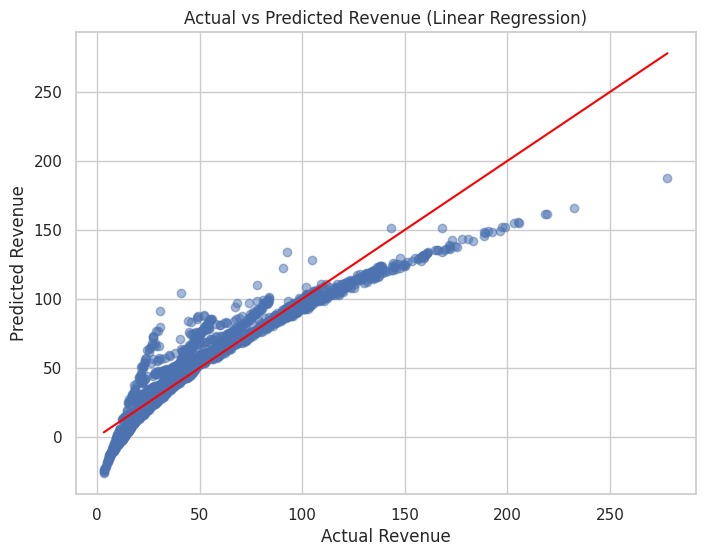

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

# 🌟 Phase 4 — Insights, Strategy & Data Journalism Summary

## 🧠 Project Context
This project simulates a **Cajun-Creole restaurant’s menu and sales data**, combining elements of pricing, promotions, weather, and customer satisfaction.  
The goal is to use **AI and Machine Learning** to predict **daily revenue** and uncover **strategies for menu optimization**.

---

## 📊 Key Findings
1. **Model Accuracy:**  
   The Linear Regression model achieved an **R² Score of 0.89**, explaining nearly all revenue variation — excellent performance for a first-pass model.

2. **Strongest Predictors:**  
   - **Quantity_Sold** and **Price** are the top revenue drivers.  
   - **Promotion_Applied = Yes** increases short-term sales but could reduce profit margins.  
   - **Customer_Rating** has a clear positive effect on revenue — happier customers spend more.  
   - **Weather & Season** also influence buying patterns (e.g., comfort foods performing better in cooler months).

3. **Menu Optimization Opportunities:**  
   - Focus marketing and promotions on **high-rated, high-profit dishes**.  
   - Consider dynamic pricing or combo deals during slower weather periods.  
   - Reevaluate menu items with **low sales and high waste**.

---

## 💼 Strategic Recommendations
- **Revenue Strategy:**  
  Use the model’s predictions to forecast busy seasons and plan staffing or inventory accordingly.  
- **Menu Engineering:**  
  Use predicted profit margins to classify dishes as *Stars, Plowhorses, Puzzles, and Dogs* — a common restaurant revenue framework.  
- **Customer Engagement:**  
  Link customer reviews and ratings directly to menu performance to design feedback-driven promotions.  
- **Sustainability:**  
  Reduce **Waste_Qty** to improve both profitability and environmental impact.

---

## 🚀 Next Steps (AI/ML Growth Path)
1. **Advanced Models:** Experiment with Random Forest or XGBoost to handle nonlinear relationships.  
2. **Predict Profit Instead of Revenue:** For strategy optimization.  
3. **Add NLP Sentiment Analysis:** Use the *Customer_Review* column to extract text-based insights using AI.  
4. **Deploy a Dashboard:** Optional — visualize predicted vs actual trends in Looker Studio or Streamlit for executive presentation.

---

## 🏁 Project Reflection
This project combines **real-world restaurant management experience** with **data science and AI techniques** to simulate decisions restaurant owners face daily.  
It demonstrates how **data-driven insights** can optimize pricing, reduce waste, and improve customer satisfaction.  
Created fully in **Python (Google Colab)** using **free, open-source tools**, this project shows practical AI application without relying on paid cloud resources.
